In [1]:
import requests
from bs4 import BeautifulSoup# Make a request to the website
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### **Define WEB URL**

In [4]:
r = requests.get('https://bola.kompas.com/')# Create an object to parse the HTML format
soup = BeautifulSoup(r.content, 'html.parser')# Retrieve all popular news links (Fig. 1)
link = []

In [5]:
for i in soup.find('div', {'class':'most__wrap'}).find_all('a'):
    i['href'] = i['href'] + '?page=all'
    link.append(i['href'])# For each link, we retrieve paragraphs from it, combine each paragraph as one string, and save it to documents (Fig. 2)

#### **Get Text from WEB URL**

In [6]:
documents = []
for i in link:
    # Make a request to the link
    r = requests.get(i)
  
    # Initialize BeautifulSoup object to parse the content 
    soup = BeautifulSoup(r.content, 'html.parser')
  
    # Retrieve all paragraphs and combine it as one
    sen = []
    for i in soup.find('div', {'class':'read__content'}).find_all('p'):
        sen.append(i.text)
  
    # Add the combined paragraphs to documents
    documents.append(' '.join(sen))

In [7]:
documents

[' KOMPAS.com - Federasi Bulu Tangkis Denmark meminta maaf seusai ganda putra Indonesia, Fajar Alfian/Muhammad Rian Ardianto dan Marcus Fernaldi Gideon/Kevin Sanjaya Sukamuljo, disebut berasal dari Malaysia. Momen yang sontak menjadi pusat perhatian itu terjadi ketika Fajar/Rian dan Marcus/Kevin hendak naik ke podium juara dan runner-up Denmark Open 2022. Pada momen tersebut, master of ceremony (MC) lebih dulu melakukan kesalahan terhadap Marcus/Kevin. MC menyebut, Marcus/Kevin adalah pasangan yang berasal dari Malaysia, bukan Indonesia. Baca juga: Final Sesama Indonesia di Denmark Open Jadi Inspirasi Juara Rahmat/Pramudya Marcus/Kevin yang mendengar kesalahan itu langsung terkejut dan terlihat bingung saat hendak naik ke podium runner-up. Mereka juga sempat bertatapan dengan Fajar/Rian yang berada di sebelahnya. Fajar Alfian pun tampak bingung, sementara Muhammad Rian Ardianto merespons dengan senyuman. Tak lama setelah itu, giliran Fajar/Rian yang dipanggil untuk naik ke podium juara

#### **Case Folding (clean text from URL)**
__________________________________________________________________________
Setelah mengekstrak dokumen dari web url, dokumen tersebut harus dibersihkan, sehingga proses selanjutnya menjadi lebih mudah untuk dipahami. Untuk setiap dokumen, proses yang dilakukan adalah menghapus semua kata, angka, dan tanda baca yang tidak perlu, huruf kecil kata, dan menghapus spasi ganda.

In [8]:
documents_clean = []
for d in documents:
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    document_test = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(document_test)

In [9]:
documents_clean

[' kompas com federasi bulu tangkis denmark meminta maaf seusai ganda putra indonesia fajar alfian muhammad rian ardianto dan marcus fernaldi gideon kevin sanjaya sukamuljo disebut berasal dari malaysia momen yang sontak menjadi pusat perhatian itu terjadi ketika fajar rian dan marcus kevin hendak naik ke podium juara dan runner up denmark open pada momen tersebut master of ceremony mc lebih dulu melakukan kesalahan terhadap marcus kevin mc menyebut marcus kevin adalah pasangan yang berasal dari malaysia bukan indonesia baca juga final sesama indonesia di denmark open jadi inspirasi juara rahmat pramudya marcus kevin yang mendengar kesalahan itu langsung terkejut dan terlihat bingung saat hendak naik ke podium runner up mereka juga sempat bertatapan dengan fajar rian yang berada di sebelahnya fajar alfian pun tampak bingung sementara muhammad rian ardianto merespons dengan senyuman tak lama setelah itu giliran fajar rian yang dipanggil untuk naik ke podium juara namun mc yang mengumumk

#### **Tokenization**
____________________________________________________________________
Tokenization adalah memecah teks menjadi potongan kata/kalimat yang disebut token. Pada umumnya 'spasi' digunakan untuk melakukan tokenisasi kata dan karakter seperti 'titik, tanda seru, dan karakter baris baru digunakan untuk Tokenisasi Kalimat.

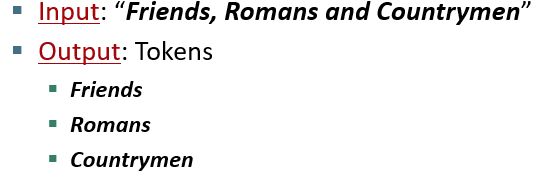

ketika dilakukan tokenisasi kalimat tersebut akan terbagi menjadi 3 bagian/token sebagaimana yang disebutkan diatas

In [10]:
documents_tokenize = [word_tokenize(entry) for entry in documents_clean]
documents_tokenize

[['kompas',
  'com',
  'federasi',
  'bulu',
  'tangkis',
  'denmark',
  'meminta',
  'maaf',
  'seusai',
  'ganda',
  'putra',
  'indonesia',
  'fajar',
  'alfian',
  'muhammad',
  'rian',
  'ardianto',
  'dan',
  'marcus',
  'fernaldi',
  'gideon',
  'kevin',
  'sanjaya',
  'sukamuljo',
  'disebut',
  'berasal',
  'dari',
  'malaysia',
  'momen',
  'yang',
  'sontak',
  'menjadi',
  'pusat',
  'perhatian',
  'itu',
  'terjadi',
  'ketika',
  'fajar',
  'rian',
  'dan',
  'marcus',
  'kevin',
  'hendak',
  'naik',
  'ke',
  'podium',
  'juara',
  'dan',
  'runner',
  'up',
  'denmark',
  'open',
  'pada',
  'momen',
  'tersebut',
  'master',
  'of',
  'ceremony',
  'mc',
  'lebih',
  'dulu',
  'melakukan',
  'kesalahan',
  'terhadap',
  'marcus',
  'kevin',
  'mc',
  'menyebut',
  'marcus',
  'kevin',
  'adalah',
  'pasangan',
  'yang',
  'berasal',
  'dari',
  'malaysia',
  'bukan',
  'indonesia',
  'baca',
  'juga',
  'final',
  'sesama',
  'indonesia',
  'di',
  'denmark',
  'open'

#### **Stemming**
__________________________________________________________________
Proses yang melibatkan pemotongan akhir atau awal kata yang diubah ke bentuk akarnya dengan tujuan menghilangkan imbuhan

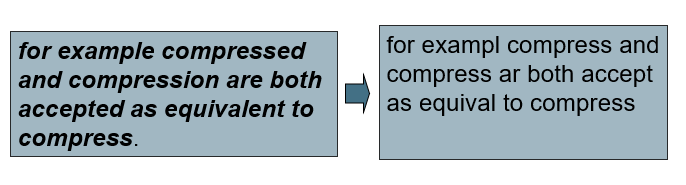

In [11]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.4 MB/s 


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
fact = StemmerFactory()
stemmer = fact.create_stemmer()

In [13]:
documents_final=[]
for w in documents_tokenize:
    documents_stemming = stemmer.stem(str(w))
    documents_final.append(documents_stemming)

In [14]:
print(documents_final)

['kompas com federasi bulu tangkis denmark minta maaf usai ganda putra indonesia fajar alfian muhammad rian ardianto dan marcus fernaldi gideon kevin sanjaya sukamuljo sebut asal dari malaysia momen yang sontak jadi pusat perhati itu jadi ketika fajar rian dan marcus kevin hendak naik ke podium juara dan runner up denmark open pada momen sebut master of ceremony mc lebih dulu laku salah hadap marcus kevin mc sebut marcus kevin adalah pasang yang asal dari malaysia bukan indonesia baca juga final sama indonesia di denmark open jadi inspirasi juara rahmat pramudya marcus kevin yang dengar salah itu langsung kejut dan lihat bingung saat hendak naik ke podium runner up mereka juga sempat tatap dengan fajar rian yang ada di belah fajar alfian pun tampak bingung sementara muhammad rian ardianto respons dengan senyum tak lama telah itu gilir fajar rian yang panggil untuk naik ke podium juara namun mc yang umum nama fajar rian nyata laku salah rupa baca juga final denmark open marcus kevin vs 

#### **Create TF-IDF**
TF-IDF (Term Frequency Inverse Document Frequency) adalah tolak ukur yang diguakan untuk mengetahui seberapa sering kata muncul dalam sebuah dokumen. 

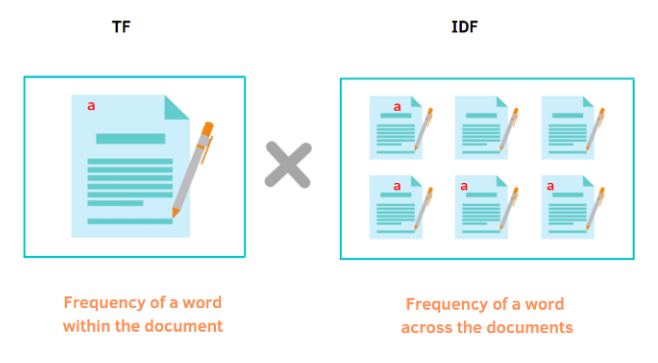

Cara menghitung TF-IDF dapat dilihat pada url berikut https://medium.com/codex/document-indexing-using-tf-idf-189afd04a9fc

Namun, pada case ini penggunaan TF-IDF tidak diitung secara manual, melainkan menggunakan library dari **sklearn**

In [16]:
import pandas as pd
import numpy as np

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer# Instantiate a TfidfVectorizer object
vectorizer = TfidfVectorizer()# It fits the data and transform it as a vector
X = vectorizer.fit_transform(documents_final)# Convert the X as transposed matrix
X = X.T.toarray()# Create a DataFrame and set the vocabulary as the index
df = pd.DataFrame(X, index=vectorizer.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9
abu,0.000000,0.075726,0.000000,0.026324,0.000000,0.000000,0.000000,0.040839,0.019584,0.000000
accept,0.025584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ada,0.033834,0.000000,0.000000,0.000000,0.000000,0.097646,0.061369,0.000000,0.000000,0.031248
adalah,0.033834,0.000000,0.033202,0.000000,0.000000,0.000000,0.000000,0.040839,0.039168,0.000000
adapun,0.000000,0.000000,0.029817,0.000000,0.000000,0.021923,0.000000,0.018338,0.017587,0.028062
...,...,...,...,...,...,...,...,...,...,...
zheng,0.000000,0.000000,0.050213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zhou,0.000000,0.000000,0.000000,0.000000,0.241214,0.000000,0.000000,0.000000,0.000000,0.000000
zii,0.000000,0.000000,0.100426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zona,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047257


#### **Cosine Similarity**
____________________________________________________________
menghitung similaritas dari query yang dimasukkan dengan database yang sudah ada

rumus cosine similarity

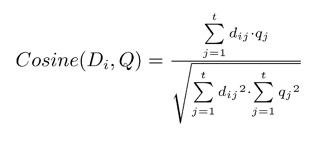

In [18]:
def get_similar_articles(q, df):
  print("query:", q)
  print("Berikut artikel dengan nilai cosine similarity tertinggi: ")  # Convert the query become a vector
  q = [q]
  q_vec = vectorizer.transform(q).toarray().reshape(df.shape[0],)
  sim = {}  # Calculate the similarity
  for i in range(10):
    sim[i] = np.dot(df.loc[:, i].values, q_vec) / np.linalg.norm(df.loc[:, i]) * np.linalg.norm(q_vec)
  
  # Sort the values 
  sim_sorted = sorted(sim.items(), key=lambda x: x[1], reverse=True)  # Print the articles and their similarity values
  for k, v in sim_sorted:
    if v != 0.0:
      print("Nilai Similaritas:", v)
      print(documents_final[k])
      print()# Add The Query

#### **Result**

In [19]:
q1 = 'manchester city'# Call the function
get_similar_articles(q1, df)

query: manchester city
Berikut artikel dengan nilai cosine similarity tertinggi: 
Nilai Similaritas: 0.16708000865799036
kompas com arsenal tetap tempat puncak klasemen liga inggris meski gagal dulang menang pada pekan ke arsenal tandang ke markas southampton stadion st mary s minggu malam wib untuk lakon laga ke mereka di premier league musim ini status puncak klasemen the gunners unggul untuk raih poin penuh pada tanding ini namun kenyataanya menang tak bisa dapat arsenal hanya bawa pulang satu angka susul hasil imbang baca juga hasil southampton vs arsenal tahan the gunners tetap kokoh di puncak arsenal unggul lebih pada menit ke lewat gol granit xhaka yang manfaat umpan silang ben white pada babak dua tepat menit ke gawang arsenal bobol akibat sontek jarak dekat stuart armstrong sampai laga bubar dua tim tidak bisa cetak gol tambah meski cuma imbang arsenal tetap ada di puncak klasemen liga inggris tim meriam london sudah koleksi poin dari laga baca juga klasemen liga inggris man c